In [1]:
import sys
sys.path.append('/home/monte.flora/python_packages/scikit-explain/')
sys.path.append('/home/monte.flora/python_packages/scikit-explain/tutorial_notebooks')
sys.path.append('/home/monte.flora/python_packages/master/ml_workflow')
sys.path.append('/work/mflora/ROAD_SURFACE')
import skexplain
import shap
import plotting_config
from skexplain.plot.base_plotting import PlotStructure
from skexplain.common.contrib_utils import get_indices_based_on_performance
import numpy as np
import xarray as xr

from load_models_and_data import load_model_and_data
from probsr_config import FIGURE_MAPPINGS, UNITS
from display_names import to_readable_names, get_units

In [2]:
hazard = 'road_surface'
estimators, X, y = load_model_and_data(hazard, test=True)

In [3]:
feature_names = X.columns

display_feature_names = {f : to_readable_names(f) for f in feature_names}
display_units = {f : get_units(f) for f in feature_names}

display_feature_names = {**display_feature_names, **FIGURE_MAPPINGS}
display_units = {**display_units, **UNITS }

In [4]:
inds_dict = get_indices_based_on_performance(estimators[1], X, y, estimator_output='probability', n_samples=25)

In [5]:
inds_dict.keys()

dict_keys(['Best Hits', 'Worst Misses', 'Worst False Alarms', 'Best Corr. Negatives'])

In [6]:
explainer = skexplain.ExplainToolkit(estimators, 
                                    X=X, 
                                   )

In [9]:
key = 'Worst Misses'

ti_ds = xr.load_dataset(f"ti_results_{key.replace(' ', '_')}.nc")
shap_ds = xr.load_dataset(f"shap_ds_results_{key.replace(' ', '_')}.nc")
lime_ds = xr.load_dataset(f"lime_results_{key.replace(' ', '_')}.nc")

In [15]:
ds = xr.merge([ti_ds, shap_ds, lime_ds])

In [16]:
ds.attrs['method'] = ['tree_interpreter', 'shap', 'lime']

(<Figure size 2400x1950 with 9 Axes>,
 array([[<AxesSubplot:title={'center':'TREE INTERPRETER'}>,
         <AxesSubplot:title={'center':'SHAP'}>],
        [<AxesSubplot:title={'center':'LIME'}>, <AxesSubplot:>]],
       dtype=object))

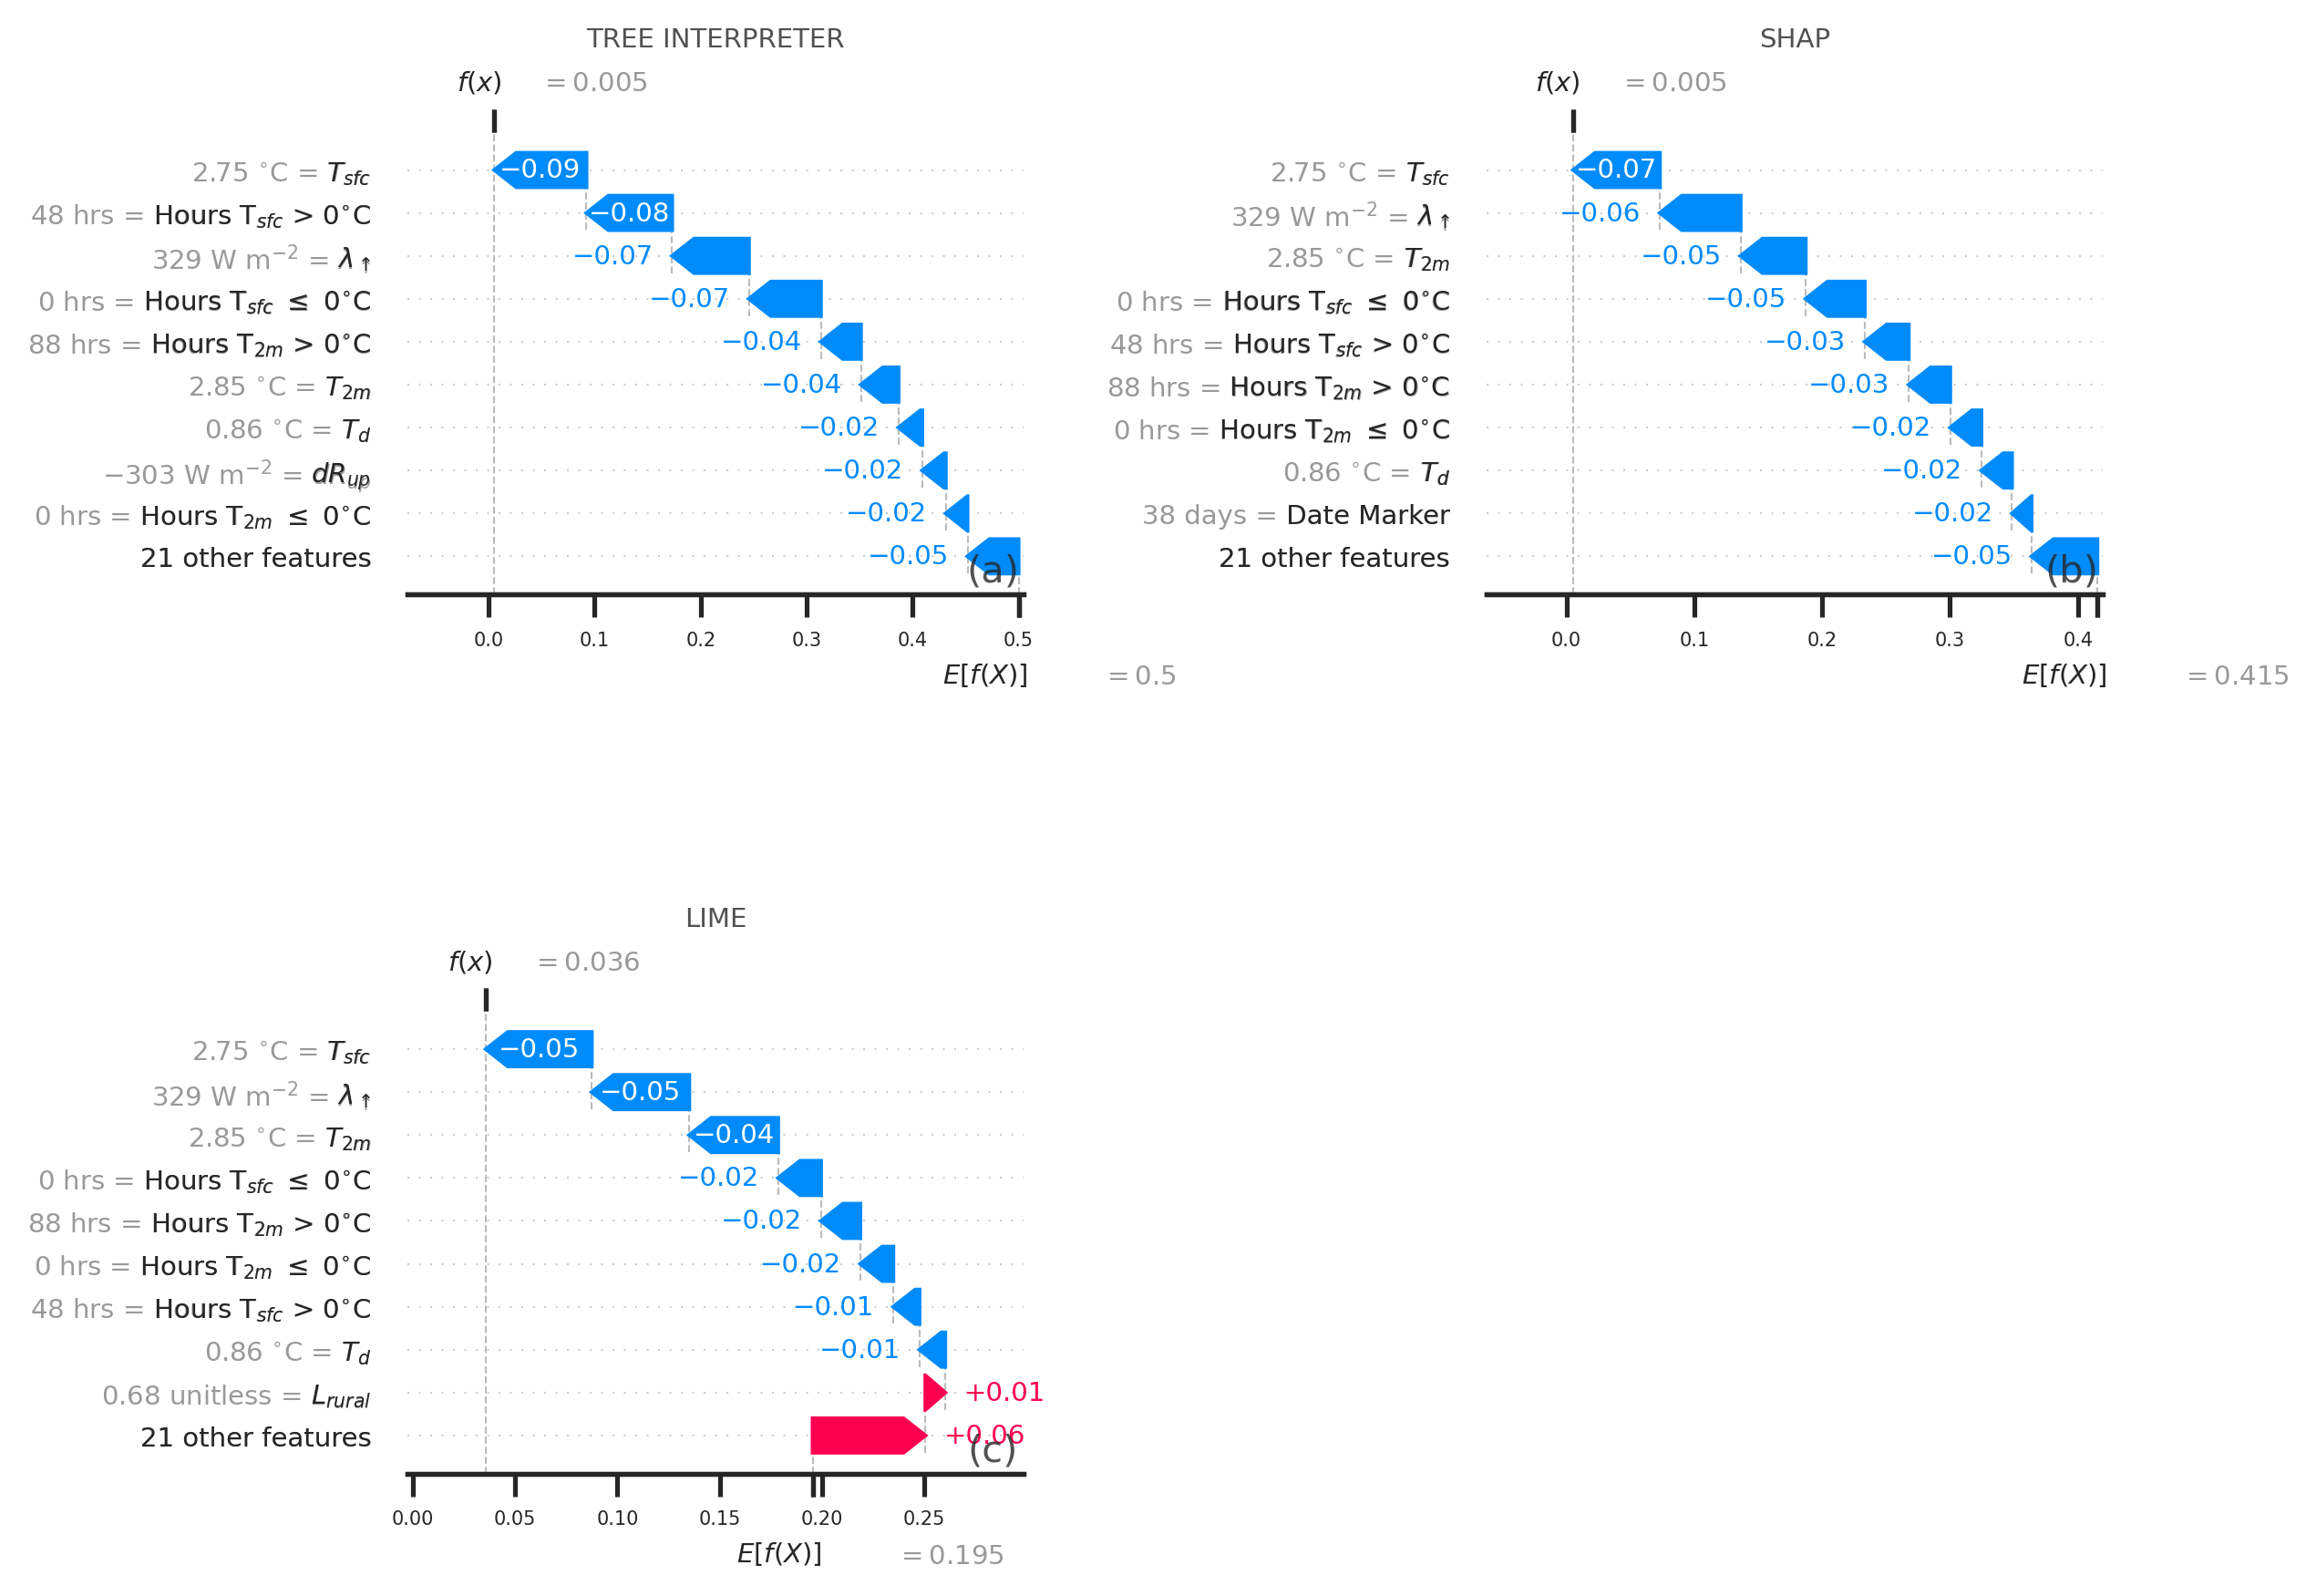

In [19]:
%matplotlib inline
explainer.plot_contributions(
                               contrib=ds,
                               display_feature_names=display_feature_names,
                               display_units = display_units,
                                )

KeyError: 't_values__Random Forest'

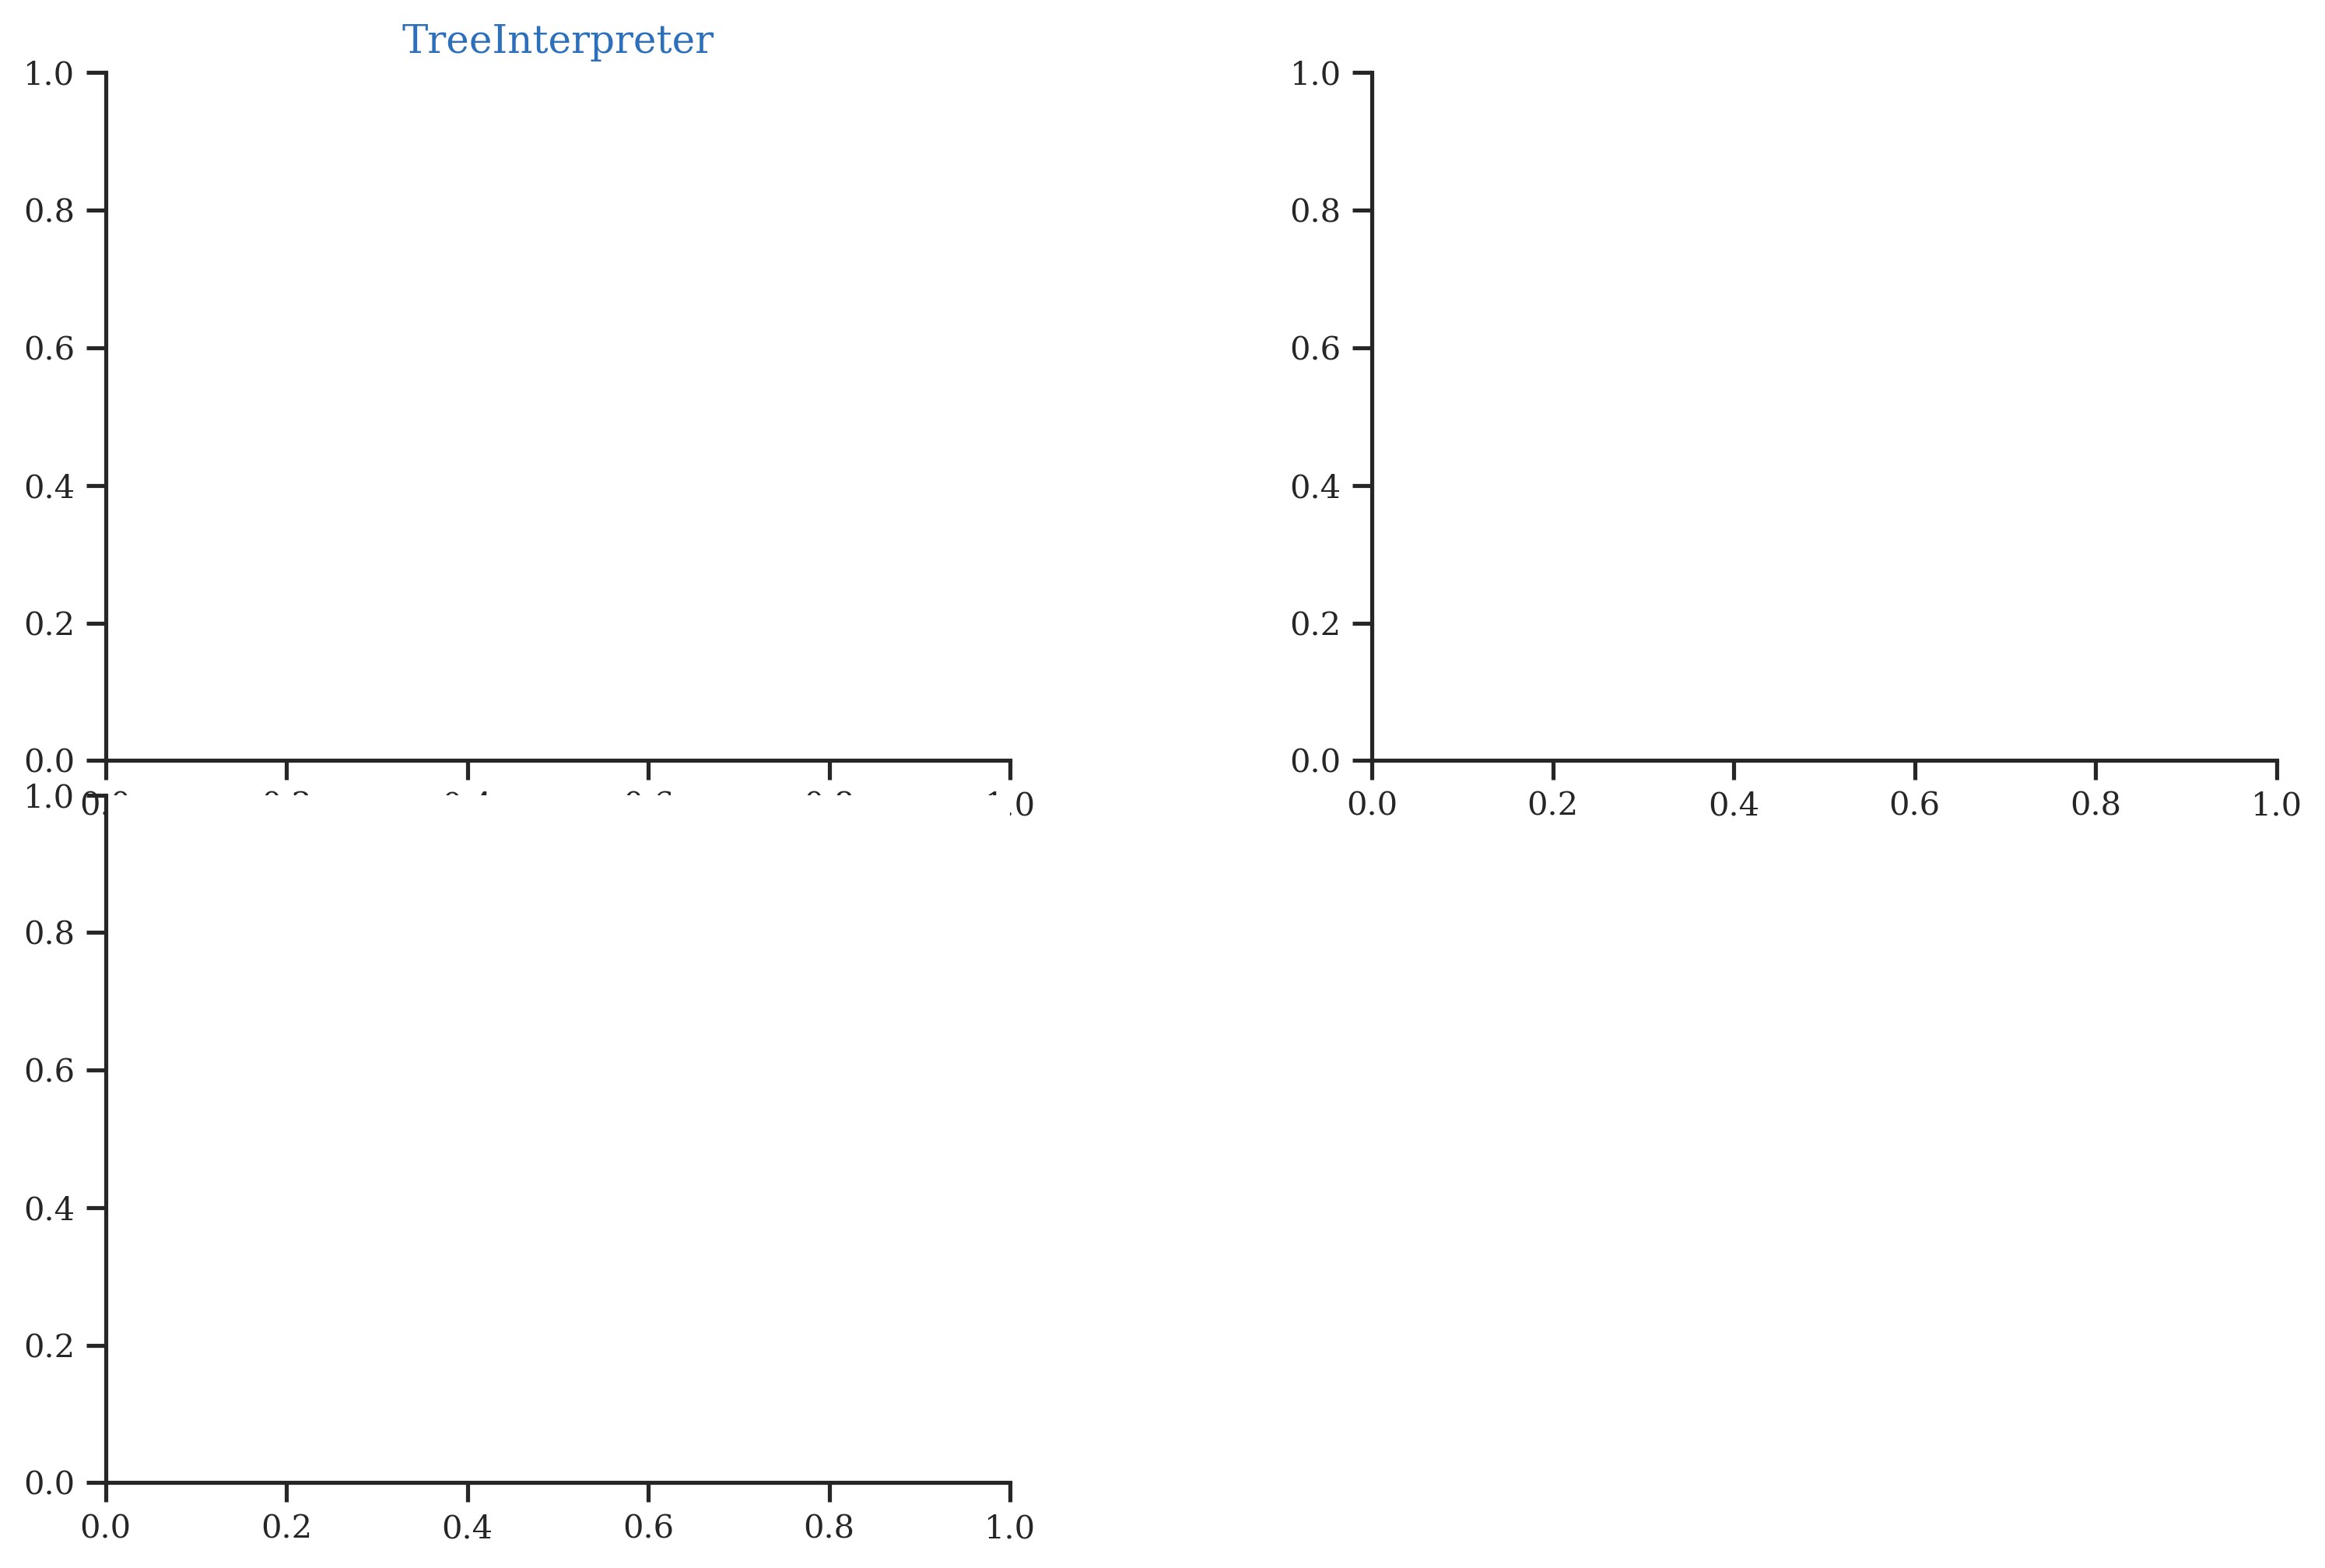

In [10]:
datasets = [ti_ds, shap_ds, lime_ds]
titles = ['TreeInterpreter', 'SHAP', 'LIME']

#datasets = [shap_ds, lime_ds]
#titles = [ 'SHAP', 'LIME']

plotter= PlotStructure(BASE_FONT_SIZE = 16)
fig, axes = plotter.create_subplots(n_panels=len(datasets), n_columns=2, figsize=(12,8), dpi=600, 
                                      wspace=0.4, hspace=0.05)

for ax, results, title in zip(axes.flat, datasets, titles):
    ax.set_title(title, color='xkcd:medium blue')   
    explainer.plot_contributions(
                               contrib=results,
                               display_feature_names=display_feature_names,
                               display_units = display_units,
                               ax=ax, 
                                )
    
plotter.add_alphabet_label(3, axes, pos=(0.95, 0.95), alphabet_fontsize=12)    
fig.tight_layout()